 Random Forest Regressor Results
Train RMSE: 0.17010294651556215
Test RMSE : 0.3578276806006952
Train R²  : 0.8767275872929619
Test R²   : 0.4720012310502565


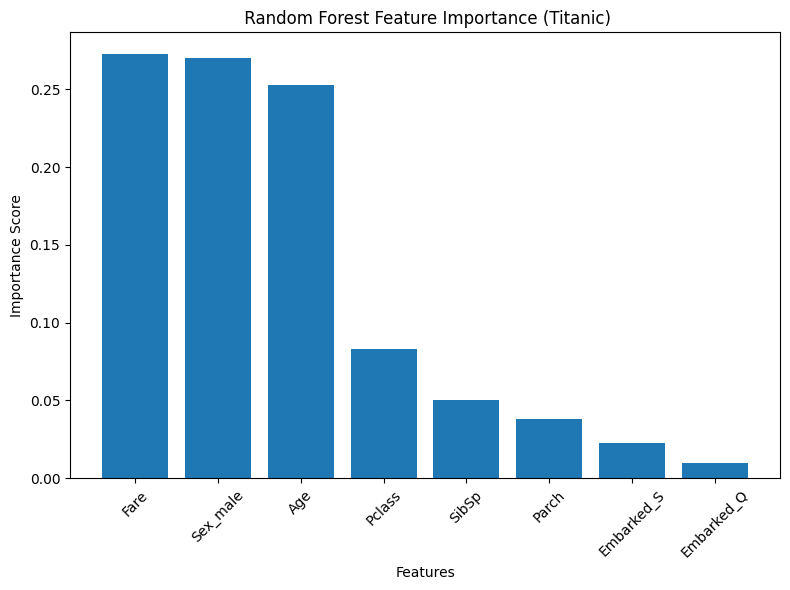

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load Titanic Dataset
df = pd.read_csv("/content/titanic.csv")

# Drop unnecessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True, errors="ignore")

# Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Encode categorical variables
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    random_state=42
)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(" Random Forest Regressor Results")
print("Train RMSE:", mean_squared_error(y_train, y_train_pred) ** 0.5)
print("Test RMSE :", mean_squared_error(y_test, y_test_pred) ** 0.5)
print("Train R²  :", r2_score(y_train, y_train_pred))
print("Test R²   :", r2_score(y_test, y_test_pred))


# Feature Importance Plot
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title(" Random Forest Feature Importance (Titanic)")
plt.tight_layout()
plt.show()


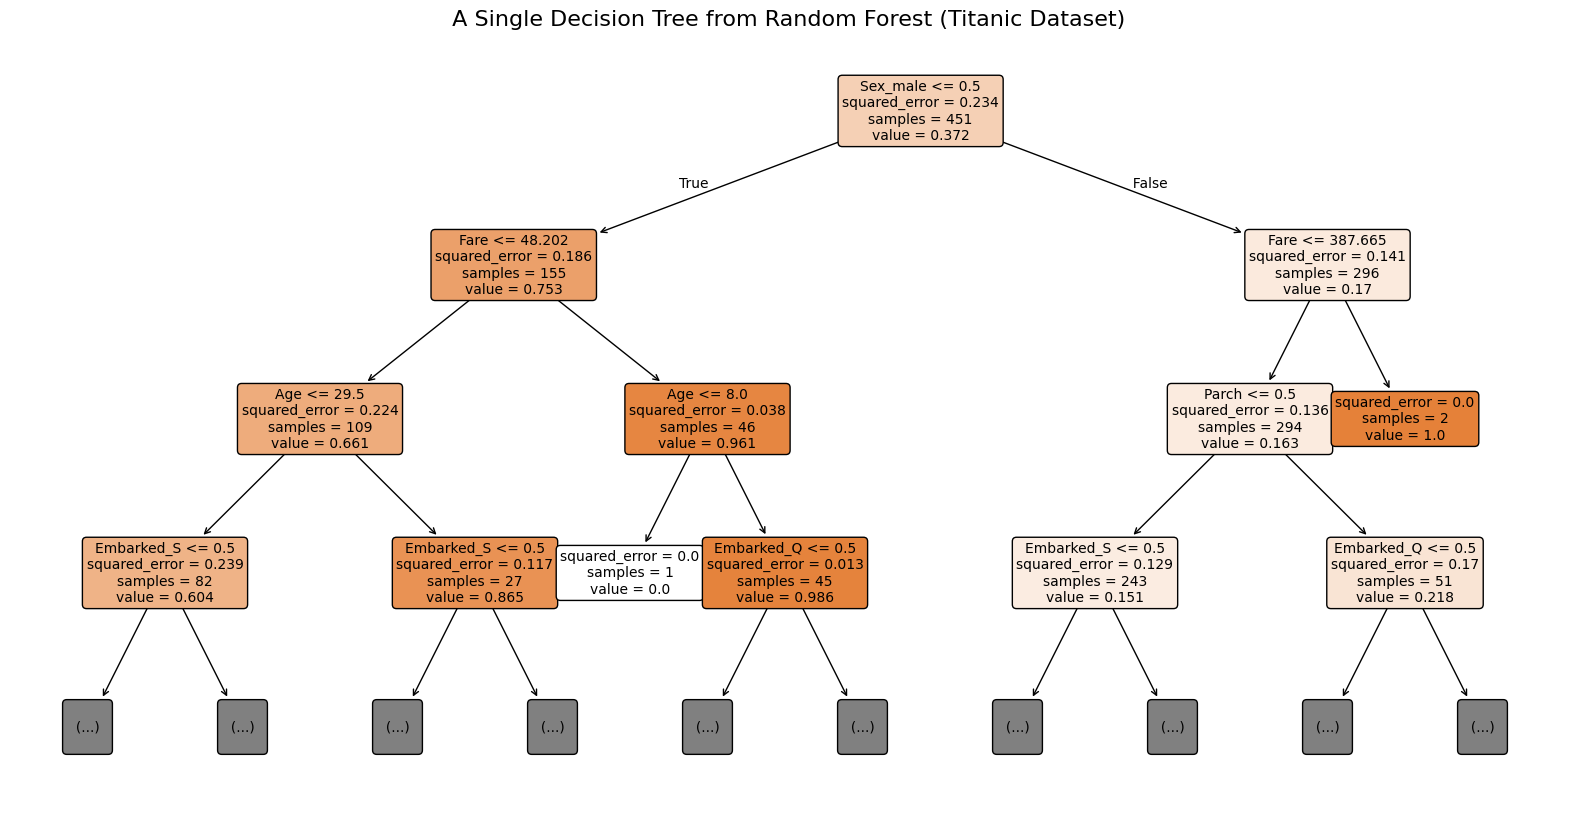

In [ ]:
from sklearn import tree

# Pick one tree from the random forest
estimator = rf.estimators_[0]

plt.figure(figsize=(20,10))
tree.plot_tree(
    estimator,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3   # show only first 3 levels for clarity
)
plt.title(" A Single Decision Tree from Random Forest (Titanic Dataset)", fontsize=16)
plt.show()
